<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/HomeCredit/app_baseline_01_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 라이브러리와 app 데이터 세트 로딩

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
%matplotlib inline

#warning.ignorewarning(...)

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
# kaggle json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c home-credit-default-risk

 92% 34.0M/36.8M [00:00<00:00, 61.4MB/s]
100% 36.8M/36.8M [00:00<00:00, 106MB/s] 
 64% 23.0M/36.1M [00:00<00:00, 51.8MB/s]
100% 36.1M/36.1M [00:00<00:00, 120MB/s] 
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 159MB/s]
 99% 269M/271M [00:02<00:00, 104MB/s] 
100% 271M/271M [00:02<00:00, 117MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 12.6MB/s]
 86% 49.0M/56.8M [00:01<00:00, 36.1MB/s]
100% 56.8M/56.8M [00:01<00:00, 39.2MB/s]
 96% 73.0M/76.3M [00:00<00:00, 92.4MB/s]
100% 76.3M/76.3M [00:00<00:00, 104MB/s] 
 93% 90.0M/96.7M [00:00<00:00, 81.5MB/s]
100% 96.7M/96.7M [00:01<00:00, 98.4MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 53.3MB/s]
 92% 100M/109M [00:00<00:00, 115MB/s] 
100% 109M/109M [00:00<00:00, 138MB/s]


In [ ]:
!unzip '/content/application_train.csv.zip'
!unzip '/content/application_test.csv.zip'
!unzip '/content/previous_application.csv.zip'

Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   
Archive:  /content/application_test.csv.zip
  inflating: application_test.csv    
Archive:  /content/previous_application.csv.zip
  inflating: previous_application.csv  


##### 코랩 버전은 Google Drive에서 데이터 세트를 로딩

In [ ]:
## colab 버전은 csv 데이터 세트를 google drive에서 로딩 해야 합니다. 이를 위해 google drive를 colab에 mount 수행. 
import os, sys 
# from google.colab import drive 

# drive.mount('/content/gdrive')

In [ ]:
%cd '/content/gdrive/My Drive/'
!ls

[Errno 2] No such file or directory: '/content/gdrive/My Drive/'
/content
application_test.csv		    installments_payments.csv.zip
application_test.csv.zip	    kaggle.json
application_train.csv		    POS_CASH_balance.csv.zip
application_train.csv.zip	    previous_application.csv
bureau_balance.csv.zip		    previous_application.csv.zip
bureau.csv.zip			    sample_data
credit_card_balance.csv.zip	    sample_submission.csv
HomeCredit_columns_description.csv


In [ ]:
#### 코랩 버전은 아래와 같이 절대 경로로 디렉토리 변경. 
#default_dir = "/content/gdrive/My Drive"
default_dir = "/content"
app_train = pd.read_csv(os.path.join(default_dir,'application_train.csv'))
app_test = pd.read_csv(os.path.join(default_dir,'application_test.csv'))

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
* TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 histogram 표현

In [ ]:
# 채무를 이행했으면 0, 하지않았으면 1
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
app_train['TARGET'].value_counts()/app_train.shape[0] # 비율

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

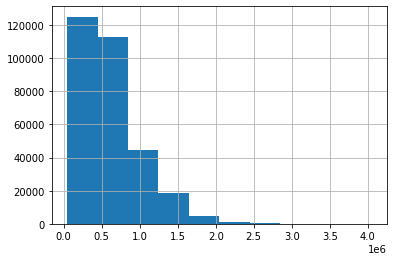

In [ ]:
app_train['AMT_CREDIT'].hist() # 대출금액
#plt.hist(app_train['AMT_INCOME_TOTAL'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


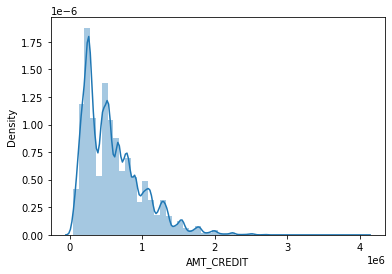

In [ ]:
sns.distplot(app_train['AMT_CREDIT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


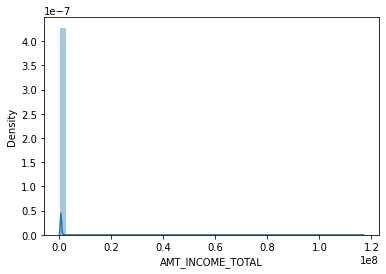

In [ ]:
# 대부분의 소득이 0근쳐에 치우쳐있다.
# 1e8 까지나오는 것은 값이 1e8까지 있다는 것이다
sns.distplot(app_train['AMT_INCOME_TOTAL'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


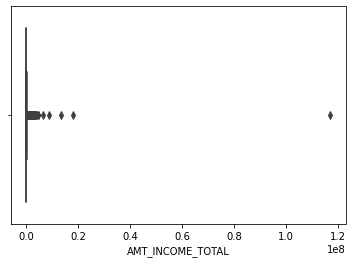

In [ ]:
# 대부분의 소득이 0 근쳐
# 이상치값이 높다
sns.boxplot(app_train['AMT_INCOME_TOTAL']) 

#### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도 
* boolean indexing으로 filtering 후 histogram 표현

In [ ]:
app_train['AMT_INCOME_TOTAL'] < 1000000 # 조건으로 사용

0         True
1         True
2         True
3         True
4         True
          ... 
307506    True
307507    True
307508    True
307509    True
307510    True
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: bool

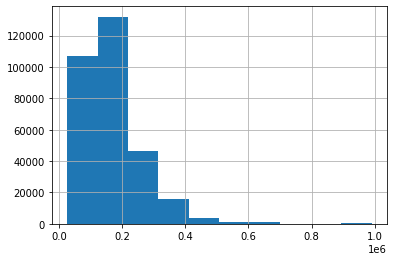

In [ ]:
# boolean indexing 으로 filtering 적용 
# 조건이 True, False로 나온다.
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'].hist()

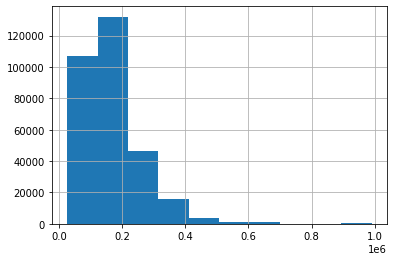

In [ ]:
# loc로도 접근 가능하다.
app_train.loc[app_train['AMT_INCOME_TOTAL'] < 1000000 , 'AMT_INCOME_TOTAL'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


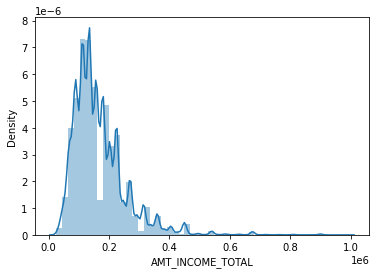

In [ ]:
# distplot으로 histogram 표현 
sns.distplot(app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'])

#### TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
* distplot과 violinplot 시각화
* plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


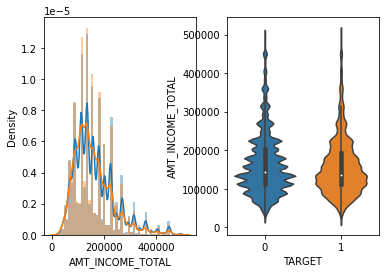

In [ ]:
fig, ax = plt.subplots(1,2)
# 조건에 대한 공부가 더 필요하다
sns.distplot(app_train[(app_train['TARGET'] == 0) & (app_train['AMT_INCOME_TOTAL'] < 500000)]['AMT_INCOME_TOTAL'], ax=ax[0])
sns.distplot(app_train[(app_train['TARGET'] == 1) & (app_train['AMT_INCOME_TOTAL'] < 500000)]['AMT_INCOME_TOTAL'], ax=ax[0])
sns.violinplot(data= app_train[app_train['AMT_INCOME_TOTAL'] < 500000], x= 'TARGET', y= 'AMT_INCOME_TOTAL' )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


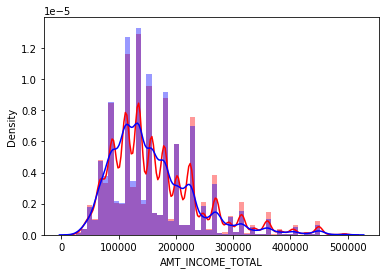

In [ ]:
# 조건을 변수로 정하는 것도 좋은 방법이다.
cond1 = app_train['TARGET'] == 1
cond0 = app_train['TARGET'] == 0
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='red')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='blue')

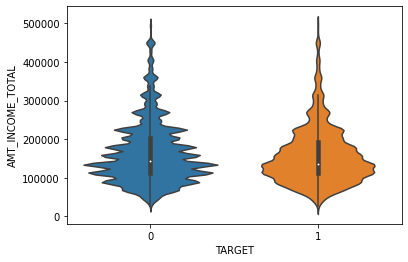

In [ ]:
sns.violinplot(x='TARGET', y = 'AMT_INCOME_TOTAL', data = app_train[cond_amt])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


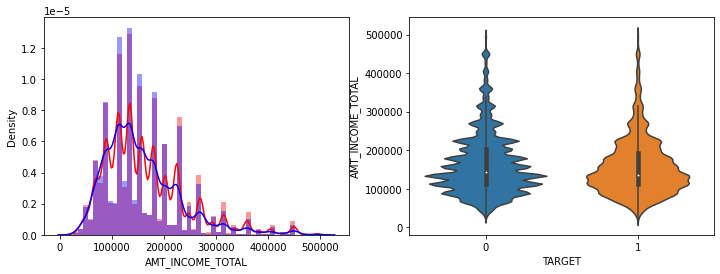

In [ ]:
cond1 = app_train['TARGET'] == 1
cond0 = app_train['TARGET'] == 0
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='red', ax=ax[0])
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='blue', ax= ax[0])
sns.violinplot(x='TARGET', y = 'AMT_INCOME_TOTAL', data = app_train[cond_amt], ax=ax[1])

#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행. 

In [ ]:
# 보통 리스트안에 넣어 관리하는데 이곳에선 concat으로 합친뒤 TARGET값 유무로 분리한다고 한다
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [ ]:
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [ ]:
apps['TARGET'].value_counts(dropna=False) # dropna=False를 주면 NaN값도 표시해준다

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

#### Object feature들을 Label Encoding
* label Encoding, one hot Encoding 모델의 성능에 그리 차이는 없다고한다
* pandas의 factorize()를 이용

In [ ]:
apps.info()
# object칼럼들이 16개가있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [ ]:
# object type들인 column들을 봐 보겠다.
apps.dtypes # column들이 index가되고 type이 값이된다.

SK_ID_CURR                      int64
TARGET                        float64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
# 조건안의 apps.dtypes 가 값으로 type을 반환한다
object_features = apps.dtypes[apps.dtypes == 'object']
object_features

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [ ]:
object_columns = apps.dtypes[apps.dtypes=='object'].index.to_list() # 인덱스값만 list형태로 뽑았다
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# 원래 이렇게했는데 위의 방법도 좋은 것 같다.
# object_feature = [column for column in apps.columns if apps[column].dtype == 'object']


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# 이제 factorize()함수로 label Encoding을 해보겠다.

# CODE_GENDER의 값들을 보겠다.
print(apps['CODE_GENDER'].value_counts())
print()

# label인코딩 할 feature를 넣으면 label Encoding값과 인덱스로 원래 object값을 반환한다
pd.factorize(apps['CODE_GENDER'])

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64



(array([0, 1, 0, ..., 1, 0, 1]), Index(['M', 'F', 'XNA'], dtype='object'))

In [ ]:
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]
apps['CODE_GENDER'].value_counts()

1    235126
0    121125
2         4
Name: CODE_GENDER, dtype: int64

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(41), object(15)
memory usage: 334.3+ MB


In [ ]:
# factorize함수를 하나의 column만 받을 수 있어서 루프문을 활용해야한다
for col in object_columns:
  apps[col] = pd.factorize(apps[col])[0]

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


#### Null값 일괄 변환

In [ ]:
apps.isnull().sum().head(122) # null값이 매우많다

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
# -999로 모든 컬럼들의 Null값 변환
# xgboost lightGBM 들은 Null값도 감안해서 모델을 만들어준다. 일단 바꿈
apps = apps.fillna(-999)

In [ ]:
apps.isnull().sum().head(122)

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == -999]

app_test.drop('TARGET', axis=1, inplace = True) # 바로반영
# app_test = app_test.drop('TARGET', axis=1, inplace = False) # 도 가능

app_train.shape, app_test.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((307511, 122), (48744, 121))

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* 피처용 데이터와 타겟 데이터 분리
* 학습용/검증용 데이터 세트 분리

In [ ]:
# SK_ID_CURR은 고유ID
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1, inplace=False)
target_app = app_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size = 0.3, random_state = 42)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

# 검증데이터를 early_stopping에 이용한다
clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50)


Training until validation scores don't improve for 50 rounds.
[100]	training's auc: 0.75225	training's binary_logloss: 0.250332	valid_1's auc: 0.740872	valid_1's binary_logloss: 0.251858
[200]	training's auc: 0.771524	training's binary_logloss: 0.243653	valid_1's auc: 0.751551	valid_1's binary_logloss: 0.247887
[300]	training's auc: 0.78527	training's binary_logloss: 0.239394	valid_1's auc: 0.755899	valid_1's binary_logloss: 0.246415
[400]	training's auc: 0.796899	training's binary_logloss: 0.235954	valid_1's auc: 0.757394	valid_1's binary_logloss: 0.245897
[500]	training's auc: 0.806535	training's binary_logloss: 0.233061	valid_1's auc: 0.75813	valid_1's binary_logloss: 0.245648
[600]	training's auc: 0.815212	training's binary_logloss: 0.230364	valid_1's auc: 0.758486	valid_1's binary_logloss: 0.245532
[700]	training's auc: 0.823391	training's binary_logloss: 0.227805	valid_1's auc: 0.758684	valid_1's binary_logloss: 0.24546
[800]	training's auc: 0.831119	training's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

##### Feature importance 시각화 

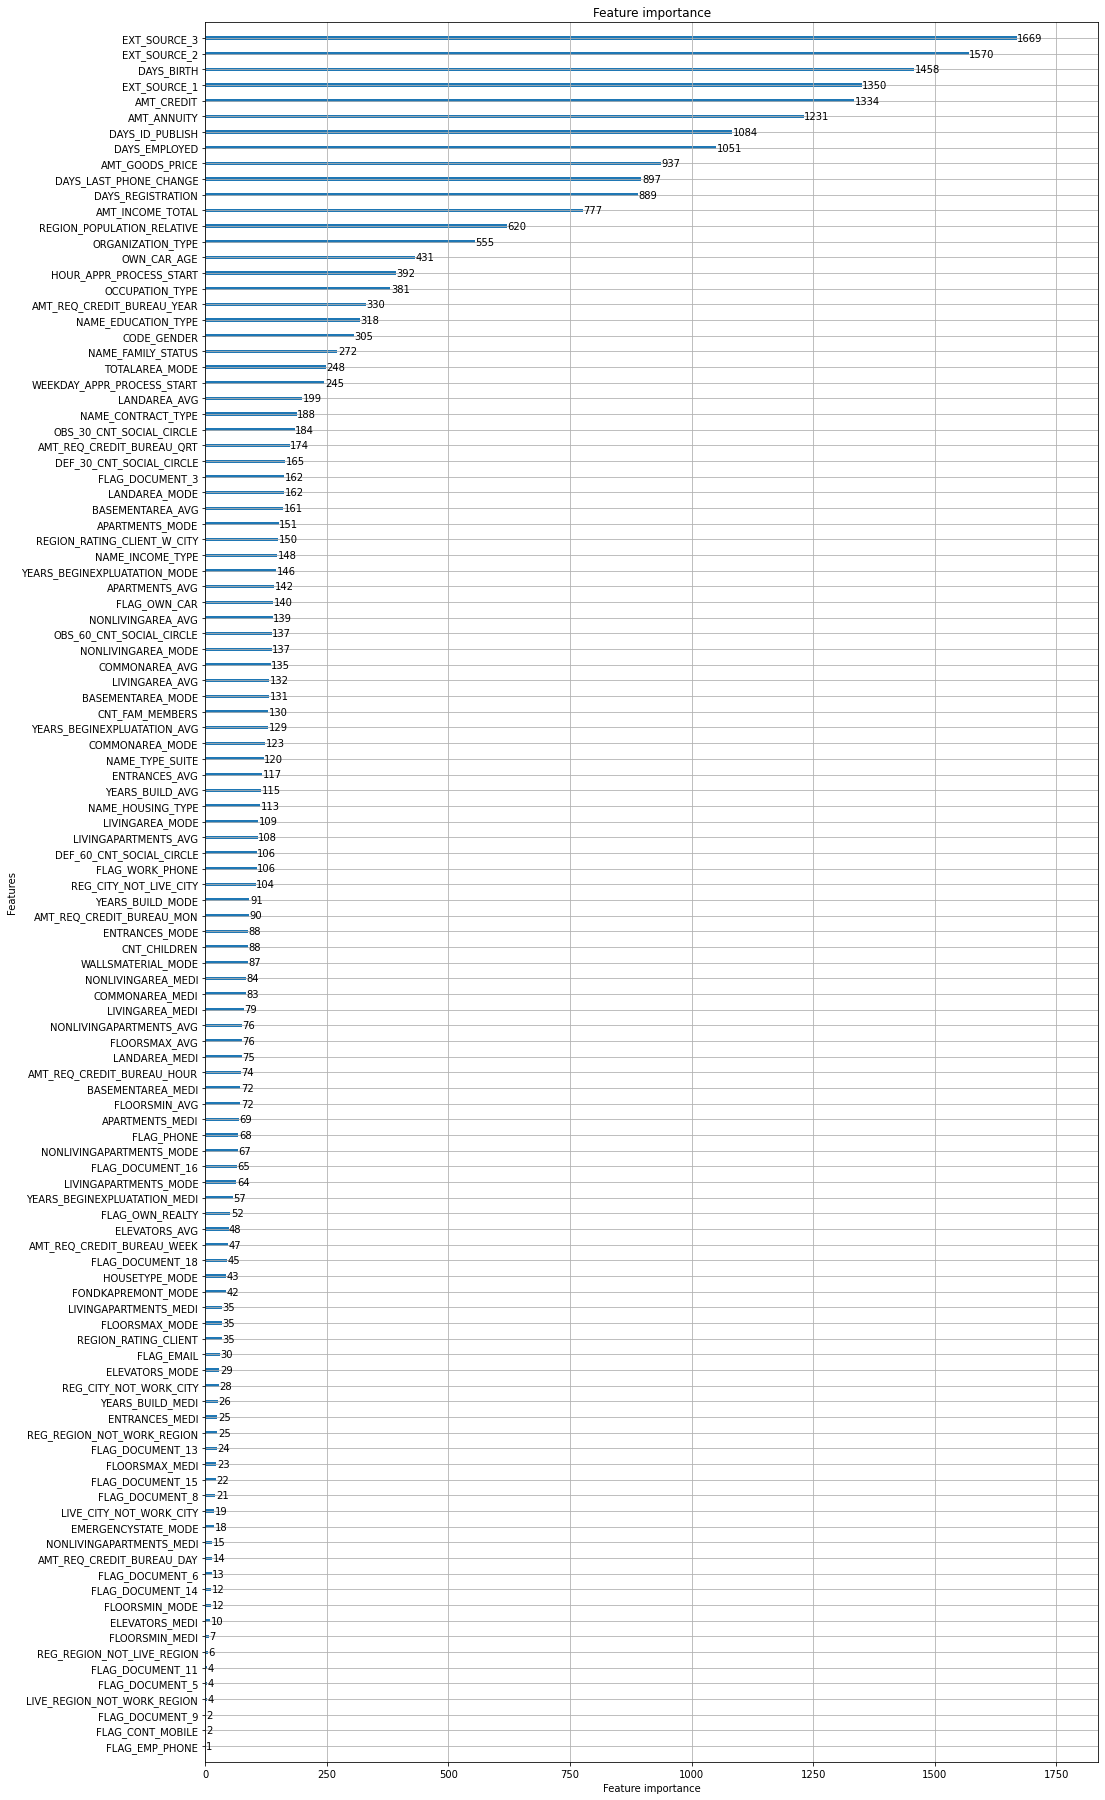

In [ ]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

#### 학습된 Classifier를 이용하여 테스트 데이터을 예측하고 결과를 Kaggle로 Submit 수행. 

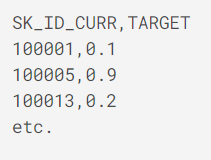       
같은 형태이다.     
1일 확율만 넣으면 된다

In [ ]:
clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1)) # 0일확율 1일 확율

array([[0.97029971, 0.02970029],
       [0.88497527, 0.11502473],
       [0.98249631, 0.01750369],
       ...,
       [0.96405974, 0.03594026],
       [0.92878876, 0.07121124],
       [0.82590368, 0.17409632]])

In [ ]:
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:,1]

In [ ]:
app_test['TARGET'] = preds
app_test['TARGET'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    0.029700
1    0.115025
2    0.017504
3    0.032209
4    0.170065
Name: TARGET, dtype: float64

In [ ]:
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_01.csv', index= False)
#0.73964, 0.74299

##### 코랩 버전은 Google Drive로 예측 결과 CSV를 생성.

In [ ]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

In [ ]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 코랩 버전은 구글 드라이브 절대 경로로 입력  
default_dir = "/content/gdrive/My Drive"
app_test[['SK_ID_CURR', 'TARGET']].to_csv(os.path.join(default_dir, 'app_baseline_01.csv'), index=False)

In [ ]:
!ls "/content/gdrive/My Drive"